In [1]:
import cv2
import numpy as np
import numpy.random as random

import matplotlib.pyplot as plt

In [2]:
from voc import make_filepath_list

rootpath = "./data/VOCdevkit/VOC2012/"

train_img, train_anno, val_img, val_anno = make_filepath_list(rootpath)

print(train_img[0])
print(train_anno[0])
print(val_img[0])
print(val_anno[0])

./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000008.xml
./data/VOCdevkit/VOC2012/JPEGImages/2008_000002.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000002.xml


In [3]:
from voc import GetBBoxAndLabel

voc_labels = ["aeroplane", "bicycle", "bird", "boat", "bottle",
              "bus", "car", "cat", "chair", "cow",
              "diningtable", "dog", "horse", "motorbike",
              "person", "pottedplant", "sheep", "sofa", "train",
              "tvmonitor"]

annotation = GetBBoxAndLabel(voc_labels)
# validationのindex 1を読み込んでみる
index = 1
img_path = val_img[index]
img = cv2.imread(img_path)

height, width, _ = img.shape

anno = annotation(val_anno[index], width, height)

In [4]:
# いったんB-Boxの正規化を元に戻す
height, width, _ = img.shape
for obj in anno:
    print(obj)
    #obj[:3] = obj[:3]+1
    obj[0] *=width
    obj[1] *=height
    obj[2] *=width
    obj[3] *=height
    print(obj)

[ 0.09        0.03003003  0.998       0.996997   18.        ]
[ 45.  10. 499. 332.  18.]
[ 0.122       0.56756757  0.164       0.72672673 14.        ]
[ 61. 189.  82. 242.  14.]


In [5]:
def show_img_annotation(img, annotations):
    fig = plt.figure(facecolor="white")
    ax = fig.add_subplot(111)
    
    ax.imshow(img)
    for anno in annotations:
        # 描画矩形の左下の座標
        x = anno[0]
        y = anno[3]
        width = anno[2] - anno[0]
        height = anno[1] - anno[3]
        bbox = plt.Rectangle((x,y), width, height,fill=False,linewidth=2, edgecolor=(0,1,0,1))
        ax.add_patch(bbox)
        # text座標
        x = anno[0]
        y = anno[1]
        bbox_props = dict(boxstyle="square,pad=0",
                          linewidth=2, facecolor=(0,1,0,1),
                          edgecolor=(0,1,0,1))
        ax.text(x,y,voc_labels[int(anno[4])],bbox=bbox_props)
    plt.show()

## imageとアノテーションの描画

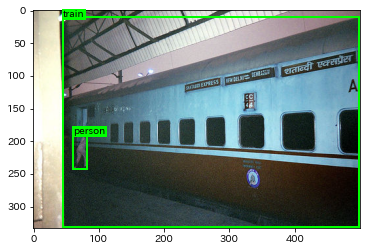

In [6]:
show_img_annotation(img, anno)